In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_data.xlsx to final_data.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
file_name='final_data.xlsx'
data = pd.read_excel(file_name,engine="openpyxl")


In [ ]:
!pip install pandas

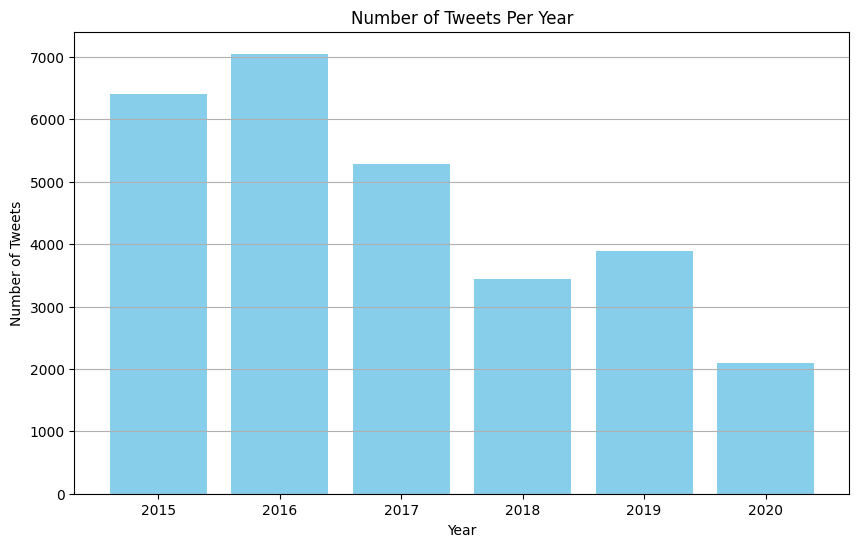

In [ ]:
data['year'] = data['timestamp'].dt.year

# Count the number of tweets per year
tweets_per_year = data['year'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(tweets_per_year.index, tweets_per_year, color='skyblue')
plt.title('Number of Tweets Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')
plt.show()

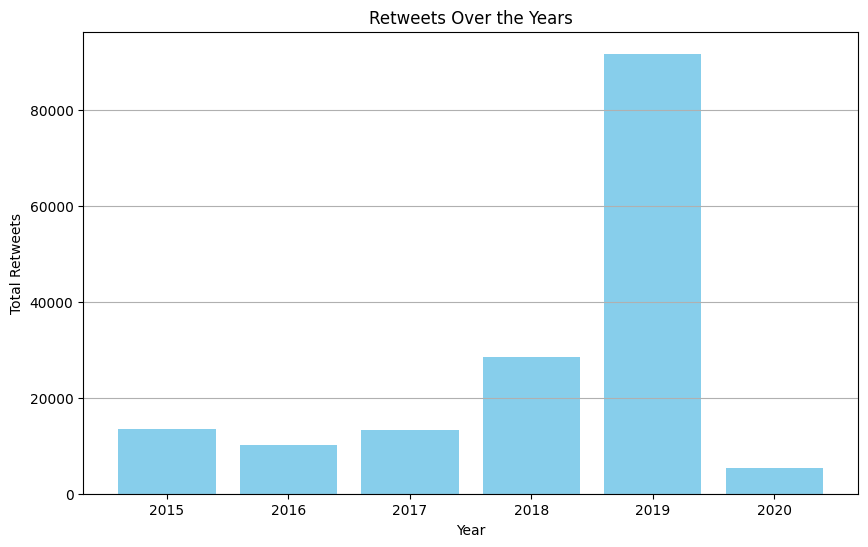

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the year from the timestamp
data['year'] = data['timestamp'].dt.year

# Group by year and sum the retweets for each year
yearly_retweets = data.groupby('year')['retweets'].sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_retweets.index, yearly_retweets, color='skyblue')

plt.title('Retweets Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Retweets')
plt.grid(axis='y')
plt.show()


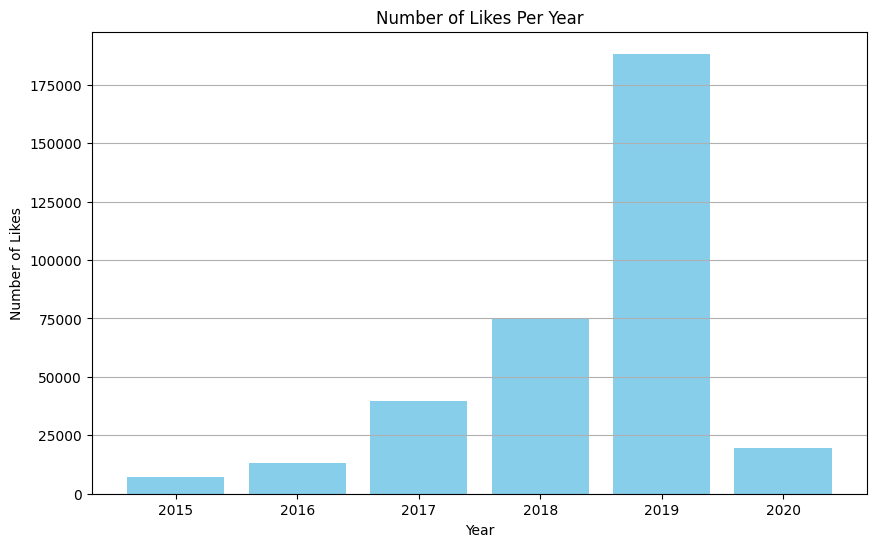

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the year from the timestamp
data['year'] = data['timestamp'].dt.year

# Sum the likes (or retweets) per year
likes_per_year = data.groupby('year')['likes'].sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(likes_per_year.index, likes_per_year, color='skyblue')
plt.title('Number of Likes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Likes')
plt.grid(axis='y')
plt.show()

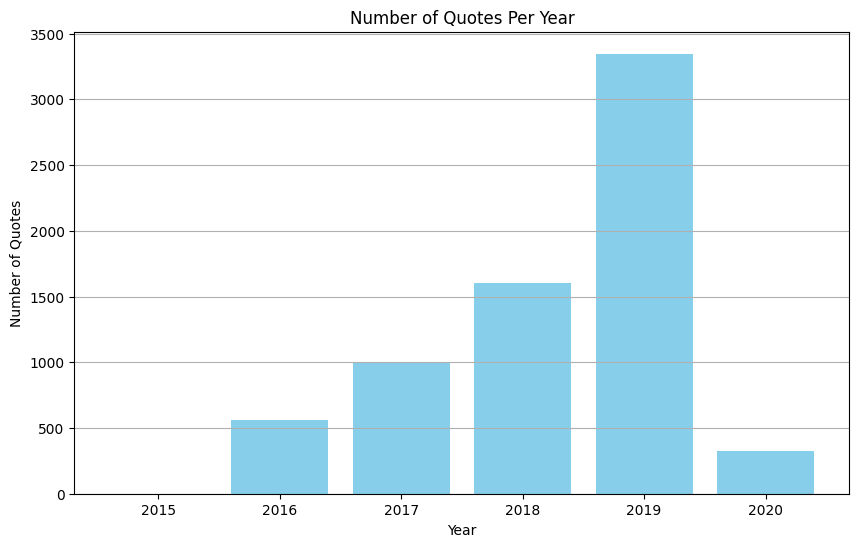

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the year from the timestamp
data['year'] = data['timestamp'].dt.year

# Sum the likes (or retweets) per year
quotes_per_year = data.groupby('year')['quotes'].sum()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(quotes_per_year.index, quotes_per_year, color='skyblue')
plt.title('Number of Quotes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Quotes')
plt.grid(axis='y')
plt.show()

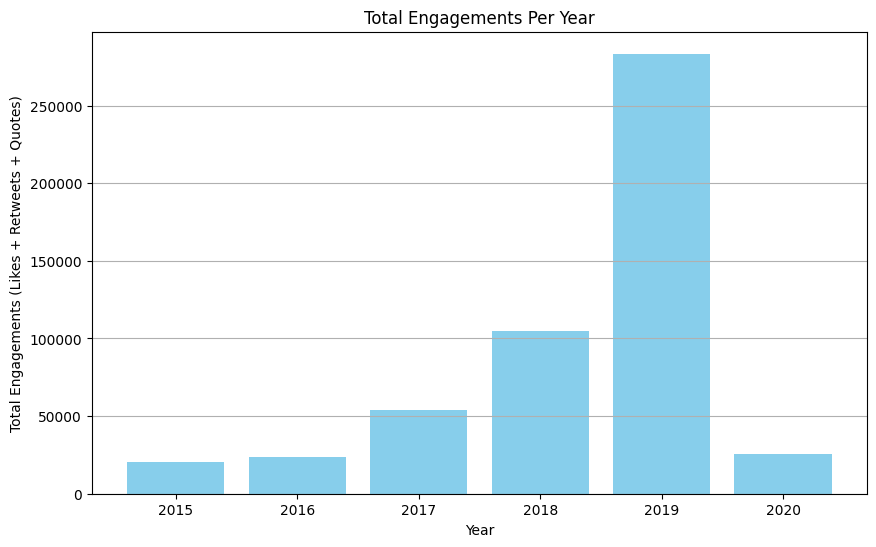

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract the year from the timestamp
data['year'] = data['timestamp'].dt.year

# Sum the likes, retweets, and quotes per year
engagements_per_year = data.groupby('year')[['likes', 'retweets', 'quotes']].sum()

# Calculate the total engagements (likes + retweets + quotes)
engagements_per_year['total_engagements'] = engagements_per_year.sum(axis=1)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(engagements_per_year.index, engagements_per_year['total_engagements'], color='skyblue')
plt.title('Total Engagements Per Year')
plt.xlabel('Year')
plt.ylabel('Total Engagements (Likes + Retweets + Quotes)')
plt.grid(axis='y')
plt.show()

In [ ]:
pip install pandas openpyxl nltk

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download NLTK datasets
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the Excel file
file_name = 'final_data.xlsx'
data = pd.read_excel(file_name, engine="openpyxl")

# Assuming 'text' is the column containing text data
column_name = 'text'

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stem the tokens
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply the preprocessing function to the 'text' column
data['preprocessed_text'] = data[column_name].apply(preprocess_text)

# Save the preprocessed data to a new Excel file
output_file_name = 'preprocessed_data.xlsx'
data.to_excel(output_file_name, index=False, engine="openpyxl")

print(f"Preprocessed data saved to {output_file_name}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Preprocessed data saved to preprocessed_data.xlsx
